In [69]:
# import libraries used
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import pipeline       # Hugging Face model
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
# mpl.style.use('ggplot')

# Sentiment Analysis

In [ ]:
completeD = pd.read_csv("../datasetsUsed/completeD.csv").drop(["Unnamed: 0"], axis=1)
completeD.head(3)

In [ ]:
# to segment the data by Country
sin = completeD[(completeD['Country'] == "Singapore")]
print("Sin: ", len(sin))

tha = completeD[(completeD['Country'] == "Thailand")]
print("Tha: ", len(tha))

tur = completeD[(completeD['Country'] == "Turkey")]
print("Tur: ", len(tur))

In [4]:
# declare instance to # define pipeline
sid = SentimentIntensityAnalyzer()      # vader

zeroShot = pipeline(task="zero-shot-classification", 
                      model="facebook/bart-large-mnli",
                      device=0)

# Define the candidate labels 
candidate_labels = ["positive", "negative"]

# Set the hyppothesis template
hypothesis_template = "The sentiment of this review is {}."

  ##### Singapore SentAnal

In [ ]:
# Put reviews in a list
sequences = sin['transComments'].to_list()

# Prediction results
sin_HFpred = zeroShot(sequences, candidate_labels,
                         hypothesis_template = hypothesis_template)

# Take a look at the data
sin_HFpred.head()
# Save the output as a dataframe
sin_HFpred = pd.DataFrame(sin_HFpred)
sin_HFpred.to_csv("sin_HFpred.csv")

  ##### Thailand SentAnal

In [ ]:
tha1 = tha.iloc[:107636,:]
tha2 = tha.iloc[107636:215272,:]
tha3 = tha.iloc[215272:,:]

In [ ]:
sequences1 = tha3['transComments'].to_list()

# Prediction results
tha_HFpred = zeroShot(sequences1, candidate_labels,
                         hypothesis_template = hypothesis_template)

# Save the output as a dataframe
tha_HFpred = pd.DataFrame(tha_HFpred)

tha_HFpred.head()
tha_HFpred.to_csv("tha_HFpred2.csv")

  ##### Turkey SentAnal

In [ ]:
tur1 = tur.iloc[:120926,:]
tur2 = tur.iloc[120926:214852,:]
tur3 = tur.iloc[214852:362778,:]
tur4 = tur.iloc[362778:,:]

In [ ]:
sequences2 = tur1['transComments'].to_list()

# Prediction results
tur_HFpred = zeroShot(sequences2, candidate_labels,
                         hypothesis_template = hypothesis_template)

# Save the output as a dataframe
tur_HFpred = pd.DataFrame(tur_HFpred)

tur_HFpred.to_csv("tur_HFpred.csv")
len(tur_HFpred)

#### Then, i manually copy-pasted the result of each country's sentiment analysis in EXCEL to "completeD.csv"

### Plot

In [51]:
d = sin['polarity1'].value_counts(normalize=True)
e = tha["polarity1"].value_counts(normalize=True)
f = tur["polarity1"].value_counts(normalize=True)

res = pd.concat([d, e, f], axis = 0)
d = pd.DataFrame(res)
d.to_csv("d.csv")

Text(0.5, 1.0, 'Polarity Distribution')

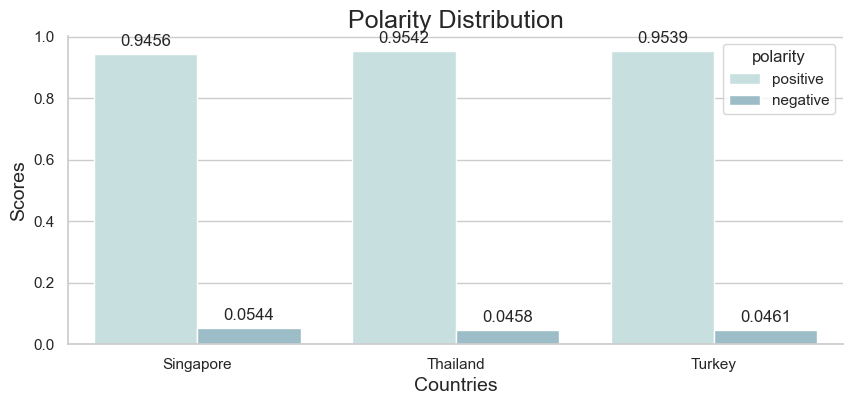

In [87]:
d = pd.read_csv("d.csv")

# plot polarity scores over countries
# grouped barplot 
plt.figure(figsize=(10, 4), )
sns.set_theme(style="whitegrid", palette="ch:start=.2,rot=-.3", rc={"axes.spines.right": False, "axes.spines.top": False})
splot = sns.barplot(x="country", y="scores", hue="polarity", 
                    data=d) 
  
for p in splot.patches: 
    splot.annotate(format(np.round(p.get_height(),decimals=4)), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points') 
      
plt.ylabel("Scores", size=14) 
plt.xlabel("Countries", size=14) 
plt.title("Polarity Distribution", size=18) 

The Singapore reviews has ~94.6% of positive comments and ~5.4% of negative comments </br>
The Thailand reviews has ~95.4% of positive comments and ~4.6% of negative comments </br>
The Turkey reviews has ~95.4% of positive comments and ~4.6% of negative comments

In [93]:
# sentiment anal - use ShilpaPBhat/Topic-Modeling-Sentiment-Analysis

# positive score
def positive_score(t):
    positive_value = sid.polarity_scores(str(t))['pos']
    return positive_value

# negative score
def negative_score(t):
    negative_value = sid.polarity_scores(str(t))['neg']
    return negative_value

#  neutral score
def neutral_score(t):
    neutral_value = sid.polarity_scores(str(t))['neu']
    return neutral_value

# getting only the compound score
def compound_score(t):
    compound_value = sid.polarity_scores(str(t))['compound']
    return compound_value

In [101]:
def polarity_decode(t):
    if  sid.polarity_scores(str(t))['pos'] >= 0.5 : 
        value = 'Positive' 
    elif sid.polarity_scores(str(t))['neg'] >= 0.5 : 
        value =  "Negative"

    else : 
        value = "Neutral"
    return value

In [96]:
# completeD['pos_sentiment_score'] = completeD["transComments"].apply(positive_score)
# completeD['neg_sentiment_score'] = completeD["transComments"].apply(negative_score)
# completeD['nue_sentiment_score'] = completeD["transComments"].apply(neutral_score)
completeD['compound_sentiment_score'] = completeD["transComments"].apply(compound_score)
# lambda review:sid.polarity_scores(str(review))

In [105]:
completeD['polarity_decode'].value_counts(normalize=True)

polarity_decode
Neutral     0.843299
Positive    0.155958
Negative    0.000743
Name: proportion, dtype: float64

In [ ]:
completeD.head(-5)

In [102]:
completeD['polarity_decode'] = completeD['transComments'].apply(polarity_decode)